# DATA PREPROCESSING

In [ ]:
# baseline cnn model for fashion mnist
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
############################ load train and test dataset##############################

In [ ]:
#Loading Data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
#Shapes of the dataset
print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape: ', test_images.shape)
print('test_labels.shape: ', test_labels.shape)

train_images.shape:  (60000, 28, 28)
train_labels.shape:  (60000,)
test_images.shape:  (10000, 28, 28)
test_labels.shape:  (10000,)


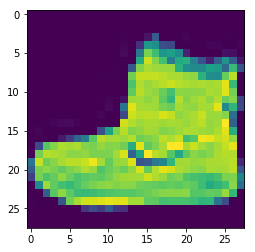

In [17]:
plt.imshow(train_images[0])

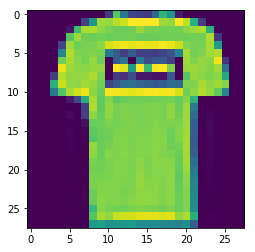

In [31]:
plt.imshow(train_images[1])

In [18]:
train_labels[0]

9

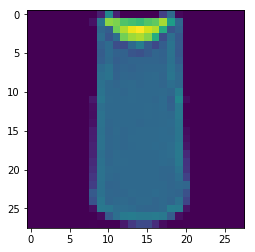

In [32]:
plt.imshow(train_images[2])

In [36]:
# reshape dataset to have a single channel
#here we're reshaping all the images to the shape of 0th image in train and test images dataset
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [38]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
## scale pixels
#Modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns.

In [ ]:
# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
# one hot encode target values
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# TRAINING

In [ ]:
#Our convolutional layers will have 64 neurons (feature maps) and a 3x3 feature detector. In turn, our pooling layers will
#use max pooling with a 2x2 matrix. 

In [21]:
# Initializes a sequential model
model = models.Sequential()

# Adding a 2D Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Adding 1st Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Adding 2nd 2D Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding 2nd Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Adding 3rd 2D Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding a flattening layer to convert Filter maps into 1D Tensor
model.add(layers.Flatten())

# Adding Dense Layer before the outpur layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy']) ###google###

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [80]:
# Fit the model
a=model.fit(train_images, train_labels, batch_size=64, epochs=10)
a

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.1329 - accuracy: 0.9500
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1322 - accuracy: 0.9503
Epoch 3/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1248 - accuracy: 0.9532
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1166 - accuracy: 0.9561
Epoch 5/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1145 - accuracy: 0.9573
Epoch 6/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1125 - accuracy: 0.9583
Epoch 7/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1040 - accuracy: 0.9613
Epoch 8/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.0945 - accuracy: 0.9634
Epoch 9/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0970 - accuracy: 0.9647
Epoch 10/10
60

# TESTING

In [82]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss 0.48695682168602944
Test accuracy 0.8933


In [83]:
#As you can see, based off the test accuracy, we’ve slightly overfitted our model.
#because test accuracy is less than the training accuracy

In [84]:
test_labels[0]
#answer will be in 0,1 form because of one hot encoding

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

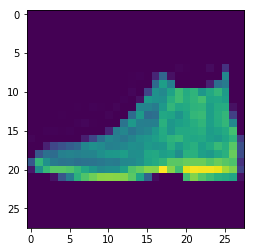

In [85]:
plt.imshow(test_images[0].reshape(28,28))

In [86]:
for i in range(10):
    print("Train label ",i, " : ", train_labels[i])
    print("Test labels ",i, " : ",test_labels[i])

Train label  0  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Test labels  0  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Train label  1  :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Test labels  1  :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Train label  2  :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Test labels  2  :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Train label  3  :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Test labels  3  :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Train label  4  :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Test labels  4  :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Train label  5  :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Test labels  5  :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Train label  6  :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Test labels  6  :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Train label  7  :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Test labels  7  :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Train label  8  :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Test labels  8  :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Train label  9  :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Test labels  9  :  [0. 0. 0. 0.

In [87]:
print(len(train_labels))AXSVX

60000


In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()